<a href="https://colab.research.google.com/github/tamnhu2913/BCG-DataScience/blob/main/Task3_FeatureAndEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive/')
sns.set(color_codes=True)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Loading data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/Data/clean_data_after_eda.csv')
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [ ]:
# tranform type of time data
date_column = data.columns[data.columns.str.contains('date')]
data[date_column] = data[date_column].apply(pd.to_datetime, format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [ ]:
price_df = pd.read_csv('/content/drive/MyDrive/Data Science/Data/price_data.csv')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [ ]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format = '%Y-%m-%d')
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


# Feature Engineering

## Difference between off-peak in December and January

In [ ]:
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()
monthly_price_by_id.head()

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,40.565969
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,40.728885
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,40.728885
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,40.728885


In [ ]:
jan_price_by_id = monthly_price_by_id[monthly_price_by_id['price_date'].dt.month == 1]
jan_price_by_id.head()

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
12,0004351ebdd665e6ee664792efc4fd13,2015-01-01,0.148047,44.266931
24,0010bcc39e42b3c2131ed2ce55246e3c,2015-01-01,0.150837,44.444710
36,0010ee3855fdea87602a5b7aba8e42de,2015-01-01,0.123086,40.565969
48,00114d74e963e47177db89bc70108537,2015-01-01,0.149434,44.266931


In [ ]:
dec_price_by_id = monthly_price_by_id[monthly_price_by_id['price_date'].dt.month == 12]
dec_price_by_id.head()

,id,price_date,price_off_peak_var,price_off_peak_fix
11,0002203ffbb812588b632b9e628cc38d,2015-12-01,0.119906,40.728885
23,0004351ebdd665e6ee664792efc4fd13,2015-12-01,0.143943,44.444710
35,0010bcc39e42b3c2131ed2ce55246e3c,2015-12-01,0.201280,45.944710
47,0010ee3855fdea87602a5b7aba8e42de,2015-12-01,0.113068,40.728885
59,00114d74e963e47177db89bc70108537,2015-12-01,0.145440,44.266930


In [ ]:
# Create the different dataframe between off price January and December
diff = pd.merge(dec_price_by_id.rename(columns={'price_off_peak_var': 'dec_price_off_peak_var', 'price_off_peak_fix': 'dec_price_off_peak_fix'}),
                jan_price_by_id.drop(columns='price_date'), on = 'id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_price_off_peak_var'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_price_off_peak_fix'] - diff['price_off_peak_fix']
diff = diff.drop(columns=['price_date','dec_price_off_peak_var', 'dec_price_off_peak_fix', 'price_off_peak_var', 'price_off_peak_fix'])
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [ ]:
#merge data and diff by ID
data = pd.merge(data, diff, on='id', how='left')
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,-0.006192,0.162916


## Average price changes across individual periods on each ID

In [ ]:
mean_price_id = price_df.groupby(['id']).agg({'price_off_peak_var':'mean', 'price_peak_var': 'mean', 'price_mid_peak_var': 'mean',
                                         'price_off_peak_fix': 'mean', 'price_peak_fix': 'mean', 'price_mid_peak_fix':'mean'}).reset_index()
mean_price_id['diff_price_energy_1st_and_2nd'] =  mean_price_id['price_off_peak_var'] - mean_price_id['price_peak_var']
mean_price_id['diff_price_energy_2nd_and_3rd'] =  mean_price_id['price_peak_var'] - mean_price_id['price_mid_peak_var']
mean_price_id['diff_price_energy_1st_and_3rd'] =  mean_price_id['price_off_peak_var'] - mean_price_id['price_mid_peak_var']
mean_price_id['diff_price_power_1st_and_2nd'] =  mean_price_id['price_off_peak_fix'] - mean_price_id['price_peak_fix']
mean_price_id['diff_price_power_2nd_and_3rd'] =  mean_price_id['price_peak_fix'] - mean_price_id['price_mid_peak_fix']
mean_price_id['diff_price_power_1st_and_3rd'] =  mean_price_id['price_off_peak_fix'] - mean_price_id['price_mid_peak_fix']
mean_price_id.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,diff_price_energy_1st_and_2nd,diff_price_energy_2nd_and_3rd,diff_price_energy_1st_and_3rd,diff_price_power_1st_and_2nd,diff_price_power_2nd_and_3rd,diff_price_power_1st_and_3rd
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,0.020545,0.030633,0.051178,16.280694,8.140345,24.421038
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0.146426,0.000000,0.146426,44.385450,0.000000,44.385450
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0.181558,0.000000,0.181558,45.319710,0.000000,45.319710
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,0.020465,0.029260,0.049725,16.258972,8.129484,24.388456
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0.147926,0.000000,0.147926,44.266930,0.000000,44.266930


In [ ]:
columns = ['id','diff_price_energy_1st_and_2nd','diff_price_energy_2nd_and_3rd','diff_price_energy_1st_and_3rd',
           'diff_price_power_1st_and_2nd','diff_price_power_2nd_and_3rd','diff_price_power_1st_and_3rd']
data = pd.merge(data, mean_price_id[columns], on = 'id', how='left')
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,diff_price_energy_1st_and_2nd,diff_price_energy_2nd_and_3rd,diff_price_energy_1st_and_3rd,diff_price_power_1st_and_2nd,diff_price_power_2nd_and_3rd,diff_price_power_1st_and_3rd
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,4.423670e+01,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000e+00,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000e+00,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000e+00,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,4.860000e-10,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


## Max price change across periods and month.

In [ ]:
#Calculate the mean difference between consecutive periods
mean_price_month = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var':'mean', 'price_peak_var': 'mean', 'price_mid_peak_var': 'mean',
                                         'price_off_peak_fix': 'mean', 'price_peak_fix': 'mean', 'price_mid_peak_fix':'mean'}).reset_index()

mean_price_month['diff_price_energy_1st_and_2nd'] =  mean_price_month['price_off_peak_var'] - mean_price_month['price_peak_var']
mean_price_month['diff_price_energy_2nd_and_3rd'] =  mean_price_month['price_peak_var'] - mean_price_month['price_mid_peak_var']
mean_price_month['diff_price_energy_1st_and_3rd'] =  mean_price_month['price_off_peak_var'] - mean_price_month['price_mid_peak_var']
mean_price_month['diff_price_power_1st_and_2nd'] =  mean_price_month['price_off_peak_fix'] - mean_price_month['price_peak_fix']
mean_price_month['diff_price_power_2nd_and_3rd'] =  mean_price_month['price_peak_fix'] - mean_price_month['price_mid_peak_fix']
mean_price_month['diff_price_power_1st_and_3rd'] =  mean_price_month['price_off_peak_fix'] - mean_price_month['price_mid_peak_fix']

mean_price_month.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,diff_price_energy_1st_and_2nd,diff_price_energy_2nd_and_3rd,diff_price_energy_1st_and_3rd,diff_price_power_1st_and_2nd,diff_price_power_2nd_and_3rd,diff_price_power_1st_and_3rd
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,0.022123,0.033743,0.055866,16.226389,8.113192,24.339581
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,0.022123,0.033743,0.055866,16.226389,8.113192,24.339581
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,0.022225,0.032069,0.054294,16.291555,8.145775,24.437330


In [ ]:
#Calculate the maximum monthly difference across time periods
max_mean_price_month = mean_price_month.groupby(['id']).agg(
    {'diff_price_energy_1st_and_2nd': 'max',
     'diff_price_energy_2nd_and_3rd': 'max',
     'diff_price_energy_1st_and_3rd': 'max',
     'diff_price_power_1st_and_2nd': 'max',
     'diff_price_power_2nd_and_3rd': 'max',
     'diff_price_power_1st_and_3rd': 'max'
     }
).reset_index().rename(columns= {
    'diff_price_energy_1st_and_2nd': 'max_mly_diff_price_energy_1st_and_2nd',
    'diff_price_energy_2nd_and_3rd': 'max_mly_diff_price_energy_2nd_and_3rd',
    'diff_price_energy_1st_and_3rd': 'max_mly_diff_price_energy_1st_and_3rd',
    'diff_price_power_1st_and_2nd': 'max_mly_diff_price_power_1st_and_2nd',
    'diff_price_power_2nd_and_3rd': 'max_mly_diff_price_power_2nd_and_3rd',
    'diff_price_power_1st_and_3rd': 'max_mly_diff_price_power_1st_and_3rd'
})

max_mean_price_month.head()

,id,max_mly_diff_price_energy_1st_and_2nd,max_mly_diff_price_energy_2nd_and_3rd,max_mly_diff_price_energy_1st_and_3rd,max_mly_diff_price_power_1st_and_2nd,max_mly_diff_price_power_2nd_and_3rd,max_mly_diff_price_power_1st_and_3rd
0,0002203ffbb812588b632b9e628cc38d,0.022225,0.033743,0.055866,16.291555,8.145775,24.437330
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.000000,0.148405,44.444710,0.000000,44.444710
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.000000,0.205742,45.944710,0.000000,45.944710
3,0010ee3855fdea87602a5b7aba8e42de,0.022581,0.031859,0.054440,16.291555,8.145775,24.437330
4,00114d74e963e47177db89bc70108537,0.149902,0.000000,0.149902,44.266931,0.000000,44.266931


In [ ]:
columns = ['id','max_mly_diff_price_energy_1st_and_2nd','max_mly_diff_price_energy_2nd_and_3rd','max_mly_diff_price_energy_1st_and_3rd',
          'max_mly_diff_price_power_1st_and_2nd', 'max_mly_diff_price_power_2nd_and_3rd', 'max_mly_diff_price_power_1st_and_3rd']
data = pd.merge(data, max_mean_price_month[columns], on = 'id', how='left')
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,diff_price_energy_1st_and_3rd,diff_price_power_1st_and_2nd,diff_price_power_2nd_and_3rd,diff_price_power_1st_and_3rd,max_mly_diff_price_energy_1st_and_2nd,max_mly_diff_price_energy_2nd_and_3rd,max_mly_diff_price_energy_1st_and_3rd,max_mly_diff_price_power_1st_and_2nd,max_mly_diff_price_power_2nd_and_3rd,max_mly_diff_price_power_1st_and_3rd
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.058257,18.590255,7.450670,26.040925,0.060550,0.085483,0.146033,44.266930,8.145775,44.26693
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.149609,44.311375,0.000000,44.311375,0.151367,0.085483,0.151367,44.444710,0.000000,44.44471
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.170512,44.385450,0.000000,44.385450,0.084587,0.089162,0.172468,44.444710,0.000000,44.44471
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.151210,44.400265,0.000000,44.400265,0.153133,0.000000,0.153133,44.444710,0.000000,44.44471
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.051309,16.275263,8.137629,24.412893,0.022225,0.033743,0.055866,16.291555,8.145775,24.43733


# Further Feature Engineering

## Tenure - How long a company has been a client of PowerCo

In [ ]:
# Calculate the difference between dates in days
data['Tenure'] = ((data['date_end'] - data['date_activ']).dt.days / 365.25).astype(int)
data['Tenure'].head()

,Tenure
0,3
1,7
2,6
3,6
4,6


In [ ]:
print('Mean of churn by Tenure')
data.groupby('Tenure').agg({'churn' : 'mean'}).sort_values(by='churn', ascending=False)

Mean of churn by Tenure


,churn
Tenure,
3,0.143713
2,0.133080
4,0.125756
13,0.095238
5,0.085425
12,0.083333
6,0.080713
7,0.073394
11,0.063584


Thought the above table, we will see clients with a cooparation period of 4 years or less than are more likely to churn. And the different between 4 years and 5 years is about 4%.

## Tranform dates into month

In [ ]:
def convert_month(dateframe, column):
  recent_day = pd.to_datetime('2016-01-01')
  date_delta = abs(recent_day - dateframe[column]).dt.days
  month = date_delta // 30.44
  return month

In [ ]:
data['month_activ'] = convert_month(data, 'date_activ')
data['month_end'] = convert_month(data, 'date_end')
data['months_modif_prod'] = convert_month(data, 'date_modif_prod')
data['months_renewal'] = convert_month(data, 'date_renewal')

In [ ]:
#remove date columns
columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
data = data.drop(columns=columns)
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,max_mly_diff_price_energy_2nd_and_3rd,max_mly_diff_price_energy_1st_and_3rd,max_mly_diff_price_power_1st_and_2nd,max_mly_diff_price_power_2nd_and_3rd,max_mly_diff_price_power_1st_and_3rd,Tenure,month_activ,month_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,0.085483,0.146033,44.266930,8.145775,44.26693,3,30.0,5.0,2.0,6.0
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0.085483,0.151367,44.444710,0.000000,44.44471,7,76.0,7.0,76.0,4.0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.089162,0.172468,44.444710,0.000000,44.44471,6,68.0,3.0,68.0,8.0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.000000,0.153133,44.444710,0.000000,44.44471,6,69.0,2.0,69.0,9.0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,0.033743,0.055866,16.291555,8.145775,24.43733,6,71.0,2.0,71.0,9.0


## Endcoding has_gas

In [ ]:
data['has_gas'] = data['has_gas'].replace(to_replace=['t', 'f'], value=[1, 0])
data.groupby(['has_gas']).agg({'churn': 'mean'})

,churn
has_gas,
0,0.100544
1,0.081856


In [ ]:
data['has_gas'].head()

,has_gas
0,1
1,0
2,0
3,0
4,0


## Create dummy variables for channel_sales and origin_up

For training, we will use the dummy variables for category columns, because the mathematics model is not accept string values.

In [ ]:
data['channel_sales'].value_counts()

,count
channel_sales,
foosdfpfkusacimwkcsosbicdxkicaua,6754
MISSING,3725
lmkebamcaaclubfxadlmueccxoimlema,1843
usilxuppasemubllopkaafesmlibmsdf,1375
ewpakwlliwisiwduibdlfmalxowmwpci,893
sddiedcslfslkckwlfkdpoeeailfpeds,11
epumfxlbckeskwekxbiuasklxalciiuu,3
fixdbufsefwooaasfcxdxadsiekoceaa,2


Because the 3 last channels have ratios very small to compared to 14606 data, we will delete those channels.

In [ ]:
data = pd.get_dummies(data,columns = ['channel_sales'], prefix = 'channel', dtype=int)
data = data.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu','channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
data.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,Tenure,month_activ,month_end,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,3,30.0,5.0,2.0,6.0,0,0,1,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,7,76.0,7.0,76.0,4.0,1,0,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,6,68.0,3.0,68.0,8.0,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,6,69.0,2.0,69.0,9.0,0,0,0,1,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,6,71.0,2.0,71.0,9.0,1,0,0,0,0


In [ ]:
data['origin_up'].value_counts()

,count
origin_up,
lxidpiddsbxsbosboudacockeimpuepw,7097
kamkkxfxxuwbdslkwifmmcsiusiuosws,4294
ldkssxwpmemidmecebumciepifcamkci,3148
MISSING,64
usapbepcfoloekilkwsdiboslwaxobdp,2
ewxeelcelemmiwuafmddpobolfuxioce,1


Similarly, the 3 last values have very low frequency, so we will drop these after creating dummy variables.

In [ ]:
data = pd.get_dummies(data,columns = ['origin_up'], prefix = 'origin_up', dtype=int)
data = data.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp','origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
data.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,2.0,6.0,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,76.0,4.0,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,68.0,8.0,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,69.0,9.0,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,71.0,9.0,1,0,0,0,0,1,0,0


## Skewed variables
On task 2, we will the distribution of Consumption and Forecast are skewed distrubution. Because the skewedness can negatively affect the analysis and model building process, so we use Logarithm to treat skewed variables.


In [ ]:
columns = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'forecast_cons_12m',
           'forecast_cons_year', 'forecast_discount_energy',
           'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
           'forecast_price_energy_peak', 'forecast_price_pow_off_peak']
data[columns].describe()

,cons_12m,cons_gas_12m,cons_last_month,imp_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,152.786896,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056
std,5.734653e+05,1.629731e+05,64364.196422,341.369366,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701
50%,1.411550e+04,0.000000e+00,792.500000,37.395000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378
75%,4.076375e+04,0.000000e+00,3383.000000,193.980000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378
max,6.207104e+06,4.154590e+06,771203.000000,15042.790000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378


Thought this table, we see the stadard of cons_12m, cons_gas_12m, cons_last_month, imp_cons, forecast_cons_12m,	forecast_cons_year, forecast_meter_rent_12m are quite high.

In [ ]:
data[columns] = np.log10(data[columns] + 1)
data[columns].describe()

,cons_12m,cons_gas_12m,cons_last_month,imp_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,4.223939,0.779244,2.264646,1.240750,2.962177,1.784610,0.050918,1.517203,0.055766,0.020918,1.636058
std,0.884515,1.717071,1.769305,1.138322,0.683592,1.584986,0.267388,0.571481,0.009438,0.020296,0.134237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.754023,0.000000,0.000000,0.000000,2.695477,0.000000,0.000000,1.235023,0.047796,0.000000,1.619163
50%,4.149727,0.000000,2.899547,1.584275,3.046836,2.498311,0.000000,1.296555,0.058109,0.035085,1.656207
75%,4.610285,0.000000,3.529430,2.289990,3.380716,3.242231,0.000000,2.120673,0.059316,0.040933,1.656207
max,6.792889,6.618528,5.887169,4.177357,4.918575,5.243970,1.491362,2.778376,0.105157,0.077722,1.780075


Check the distribution of some of these.

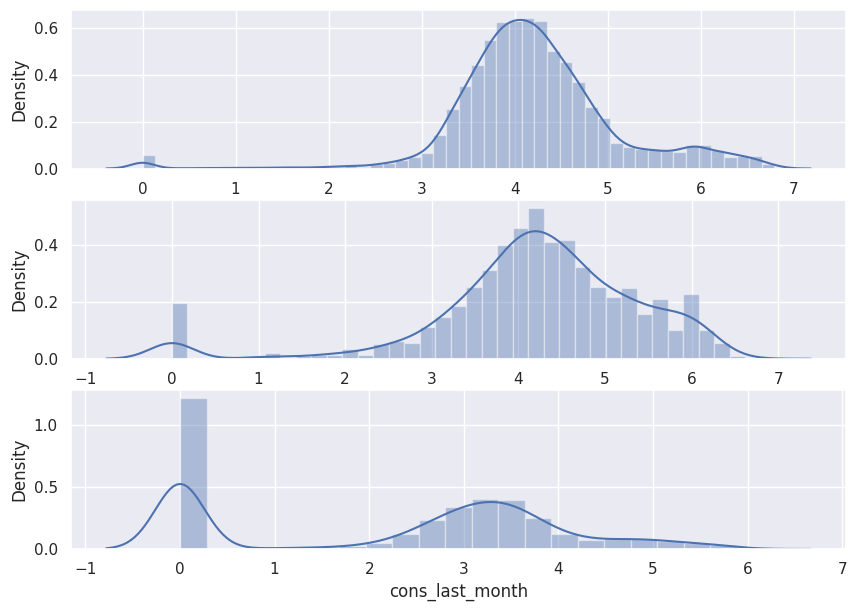

In [ ]:
fig, axs = plt.subplots(nrows = 3, figsize=(10,7))

sns.distplot(data["cons_12m"], ax=axs[0])
sns.distplot(data[data["has_gas"]==1]["cons_gas_12m"], ax=axs[1])
sns.distplot(data["cons_last_month"], ax=axs[2])
plt.show()

# Check correlations

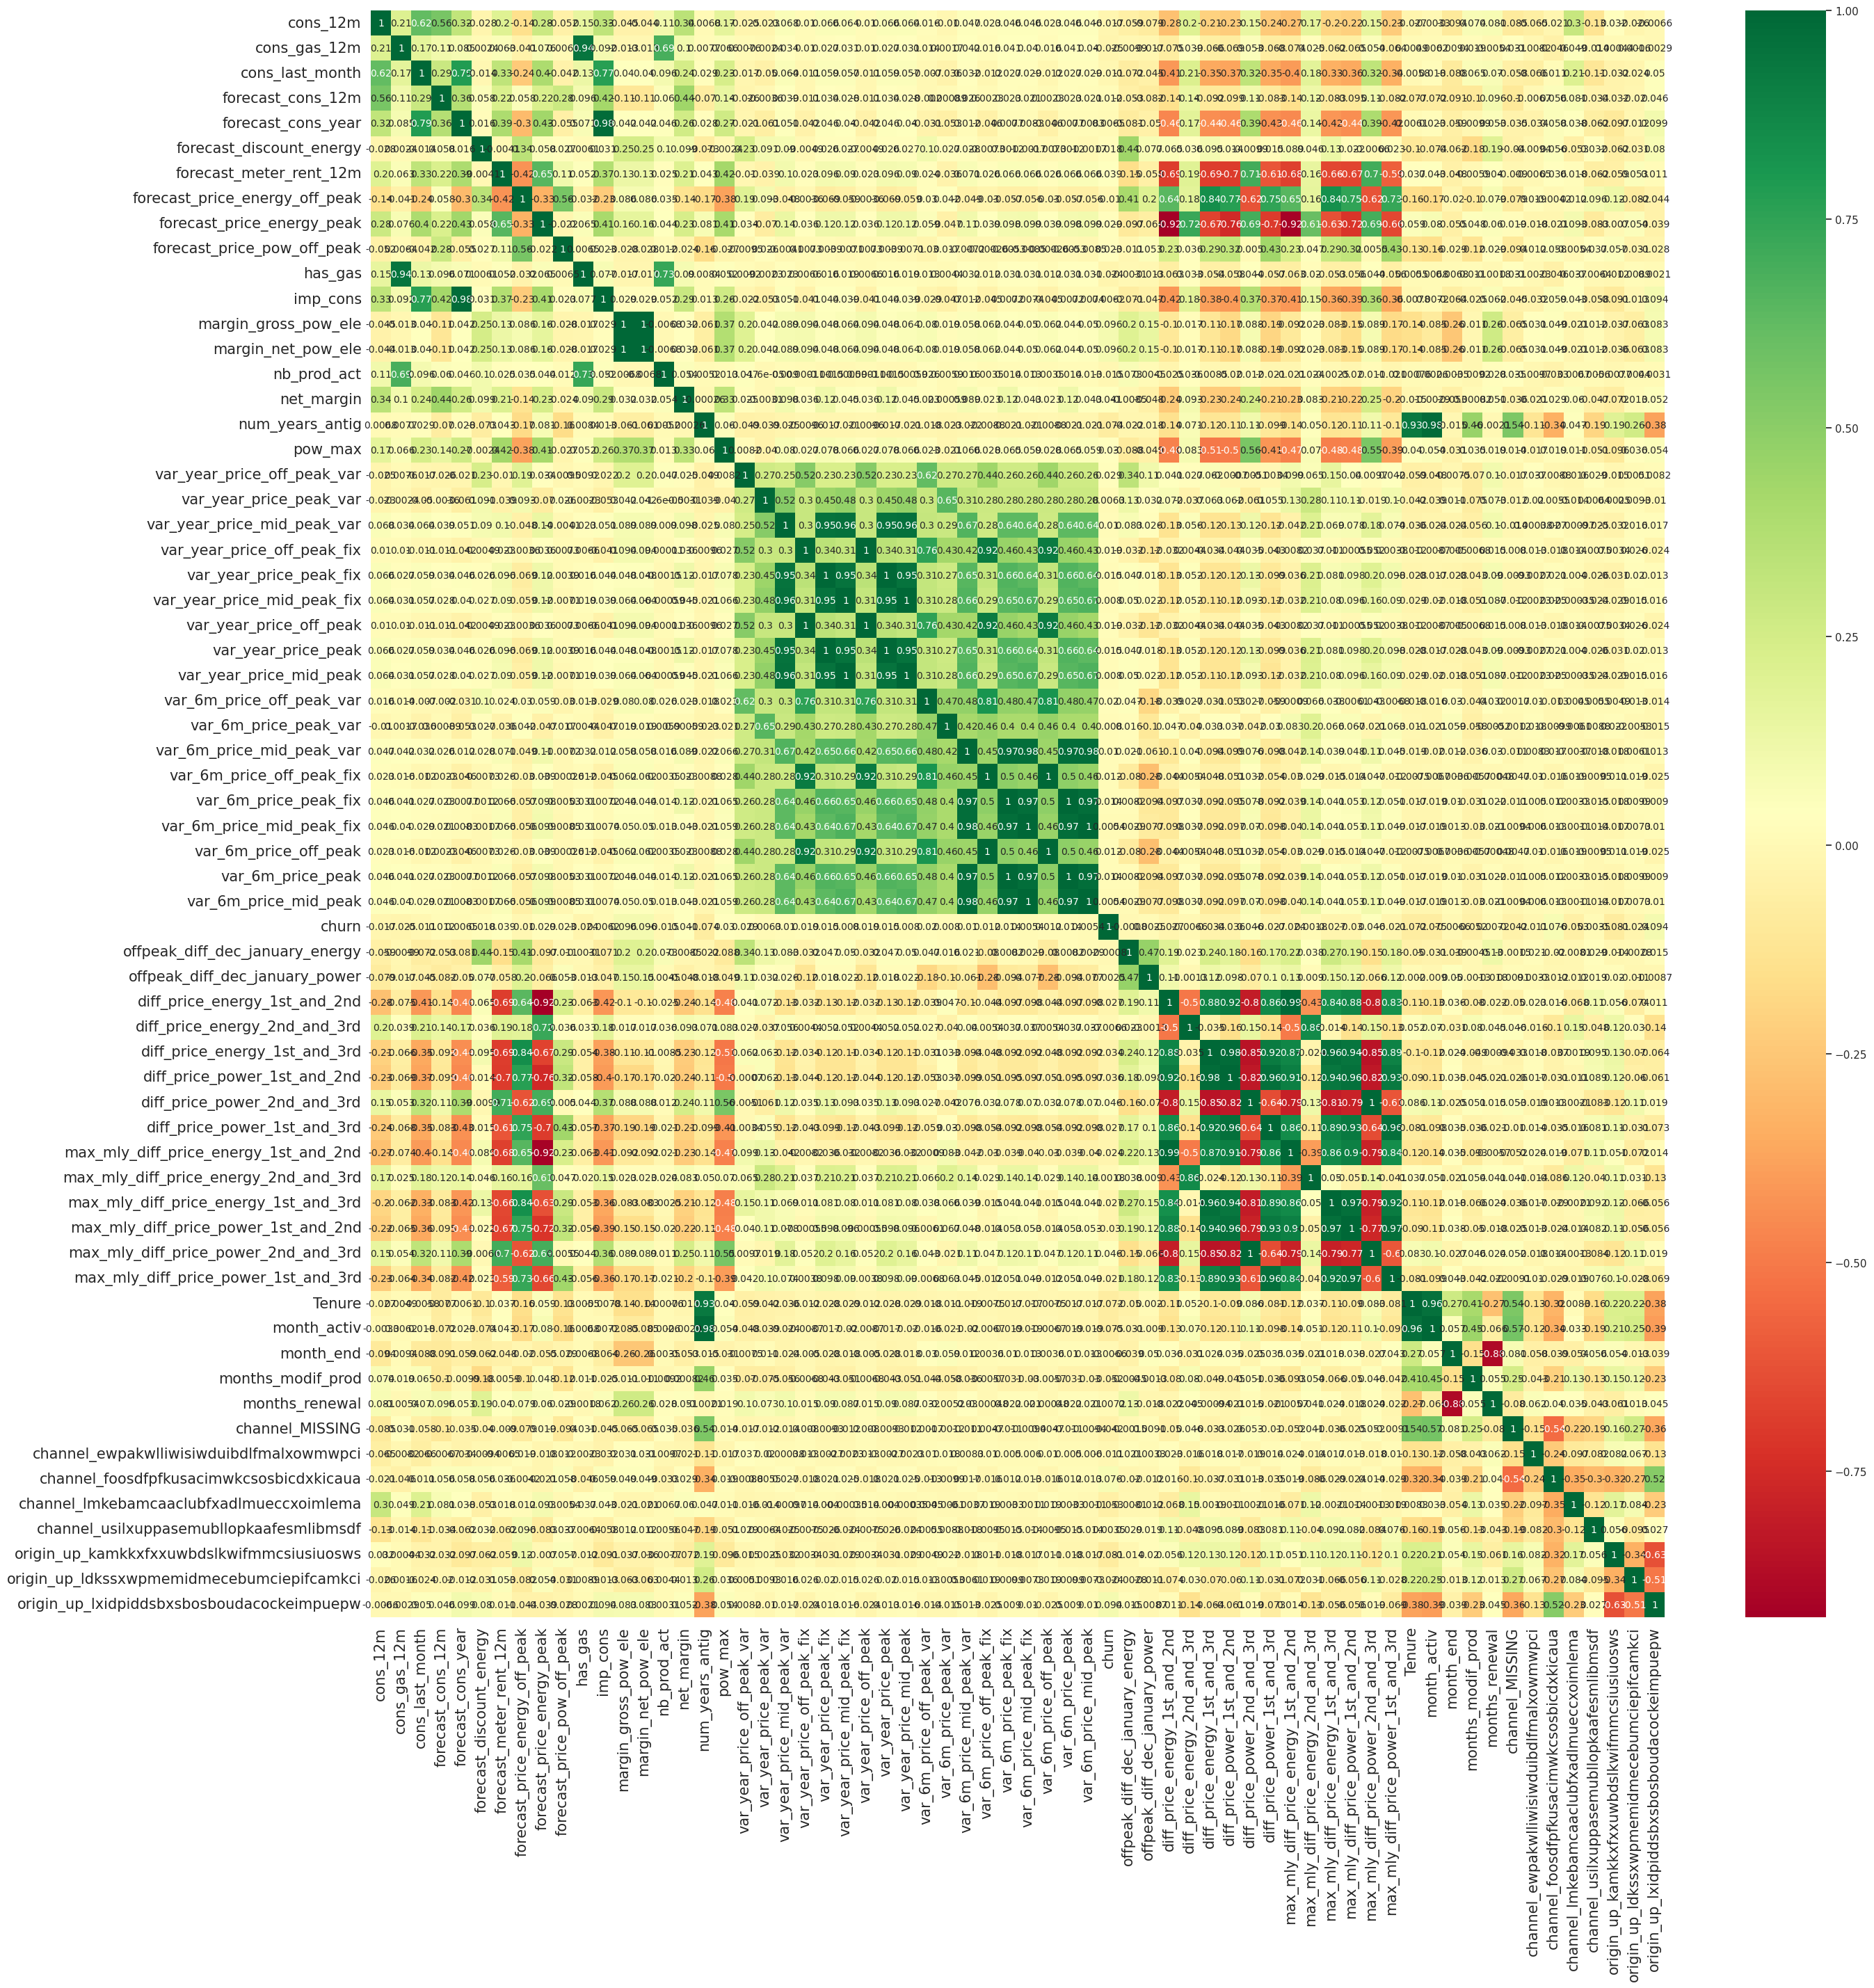

In [ ]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(30,30))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            annot = True, cmap='RdYlGn', annot_kws={'size':10})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
data = data.drop(columns=['num_years_antig', 'forecast_cons_year'])
data.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.047073,0.040659,1.619163,...,2.0,6.0,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.059075,0.000000,1.656207,...,76.0,4.0,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.066622,0.036589,1.656207,...,68.0,8.0,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.059448,0.000000,1.656207,...,69.0,9.0,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.048014,0.041399,1.619163,...,71.0,9.0,1,0,0,0,0,1,0,0


# Building Random Forest Classifier Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

## Model Sampling
We use 75% data for train set and 25% data for test.

In [ ]:
copy_data = data.copy()

X = copy_data.drop(columns=['id', 'churn'])
Y = copy_data['churn']

print(X.shape, Y.shape)

(14606, 61) (14606,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(10954, 61) (3652, 61) (10954,) (3652,)


## Model Training

In [ ]:
model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print('Accuracy: ', acc)
print('Precision: ', prec)
print('Recall: ', rec)
print('F1: ', f1)

Accuracy:  0.9036144578313253
Precision:  0.8181818181818182
Recall:  0.04918032786885246
F1:  0.09278350515463918


In [ ]:
print('CLassification Report')
print(classification_report(y_test, y_pred))

CLassification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.82      0.05      0.09       366

    accuracy                           0.90      3652
   macro avg       0.86      0.52      0.52      3652
weighted avg       0.90      0.90      0.86      3652



## Model Understanding

In [ ]:
feature_imp = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

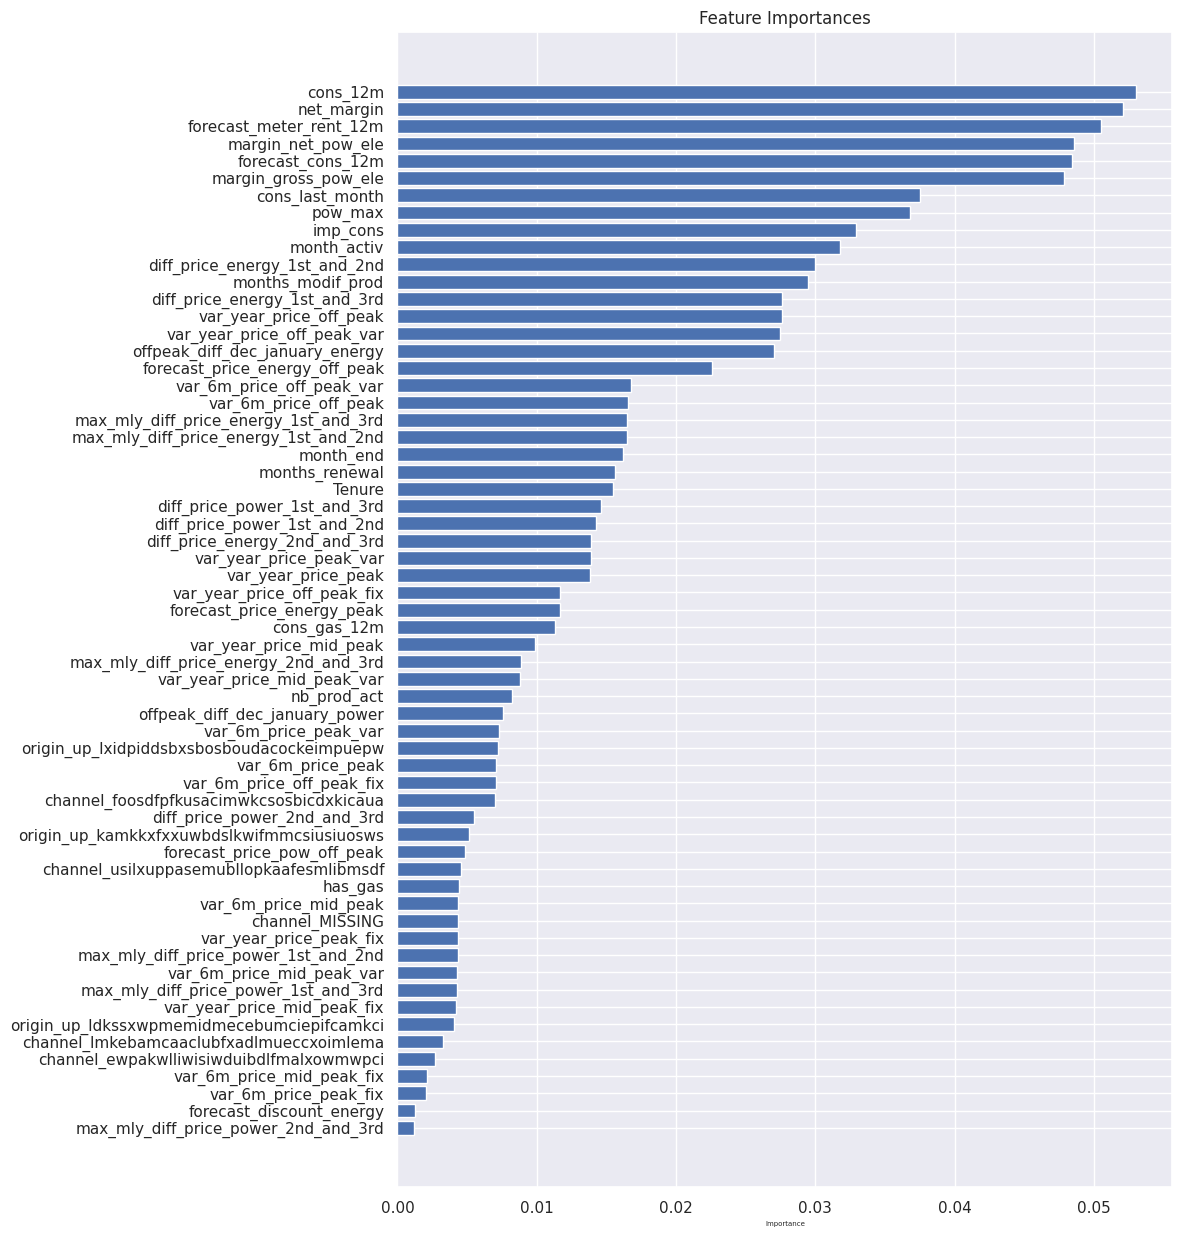

In [ ]:
plt.figure(figsize=(10, 15))
plt.title('Feature Importances')
plt.barh(range(len(feature_imp)), feature_imp['importance'], color='b', align='center')
plt.yticks(range(len(feature_imp)), feature_imp['feature'])
plt.xlabel('Importance', fontsize=5)
plt.show()